# Programming with Python MOD007891 
## Assessment Element 010 ( Weighting = 100% )


# Section 1:  ( Analysis of Diabetic Patient Data ) - ( Weighting = 30% )

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases.** The dataset consist of several medical predictor **(independent)** variables and one target **(dependent)** variable, Outcome. 

Independent variables include:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- Two-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Outcome: Class variable (0 or 1).


### Upload the provided dataset (diabetes.csv) into your Jupyter Notebook working directory and then complete the following tasks.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
df = pd.read_csv("diabetes.csv")

In [2]:
# Let's look at the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. Identify the total number of records? 

In [3]:
df.shape[0]

768

### 2. Display data types for all columns? 

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### 3.  Check the dataset for the missing values? 

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 4. Display descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset such as total count, min, max, standard deviation, max and quartiles?

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As you probably have noticed, many columns have a **minimum value of 0** which is clearly not logical. Those are essentially **missing values** in our dataset. 



### 5. Identify columns with missing values and find out their frequency? 

In [7]:
df[df==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### 6. Identify the number of positive and negative patients based on target (dependent) variable, outcome? Plot the frequencies using a bar chart?

<Axes: >

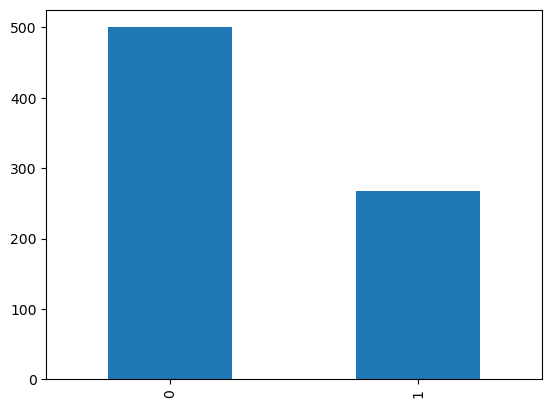

In [8]:
df['Outcome'].value_counts().plot(kind = 'bar')

### 7. Display correlation among all dependent and independent variables using the correlation matrix? Illustrate correlation data using a heatmap plot?  

<Axes: >

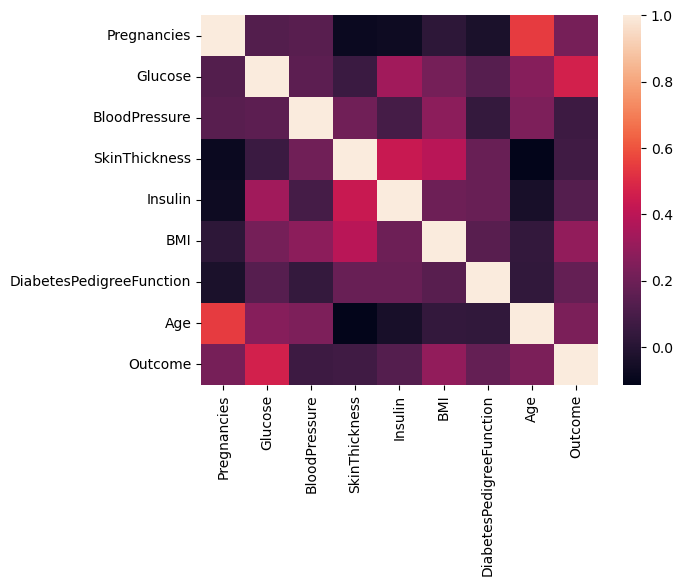

In [9]:
correlation = df.corr()
sns.heatmap(correlation)

We have observed earlier that missing values in this dataset are represented by 0. This is clearly not a good practice and negatively impacts our data analysis. 



### 8. Replace these zero values with NAN?

In [10]:
df.replace({0:np.nan},inplace=True)

### 9. Check out the variables for 0 value once again?  

In [11]:
df[df==0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 10. Check out the missing values counts per variable?

In [12]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### 11. Identify the mean value for each variable? 

In [13]:
df.mean()

Pregnancies                   4.494673
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       1.000000
dtype: float64

### 12. For the following columns, fill missing values with mean column values?  
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [14]:
col_list = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in col_list:
    df[col] = df[col].fillna(np.mean(df[col]))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,NaN
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63,NaN
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27,NaN
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30,NaN
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1.0


### 13. Display descriptive statistics and checkout the min values of the aforementioned columns once again? Any ZEROS ? 

In [15]:
df[col_list].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.435949,12.096346,8.790942,85.021108,6.875151
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,25.000000,121.500000,27.500000
50%,117.000000,72.202592,29.153420,155.548223,32.400000
75%,140.250000,80.000000,32.000000,155.548223,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


### 14. Check out the missing values counts per variable, once again? 

In [16]:
df.isnull().sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### 15. Plot data distribution of each variable? Explain your thoughts 

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

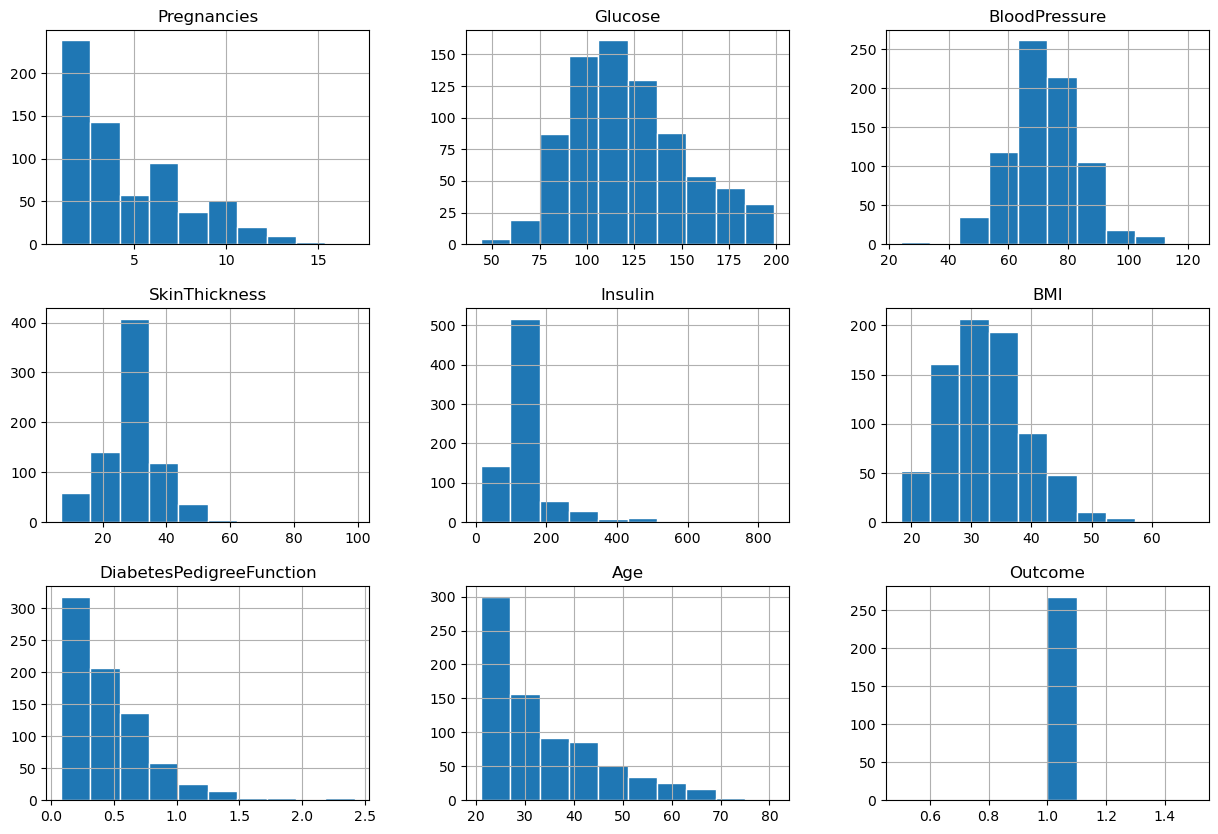

In [17]:
df.hist(figsize=(15,10), edgecolor='white')

A Boxplot is a method for graphically depicting groups of numerical data through their quartiles. 

### 16. Plot the Boxplot for each variable? interpret the diagrams 

<Axes: >

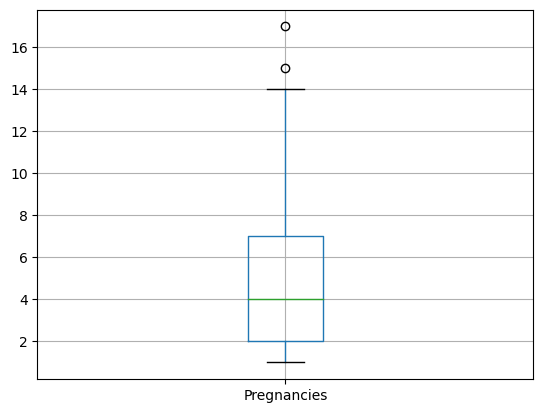

In [18]:
df[['Pregnancies']].boxplot()

<Axes: >

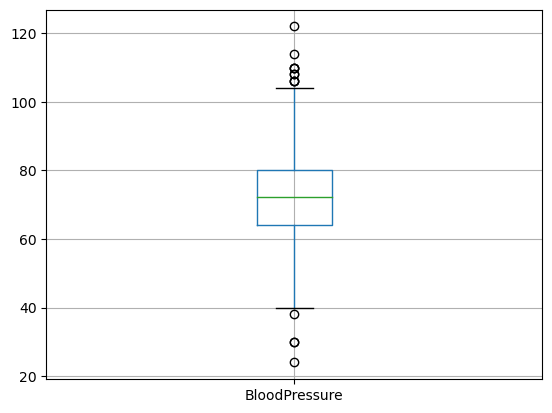

In [19]:
df[['BloodPressure']].boxplot()

<Axes: >

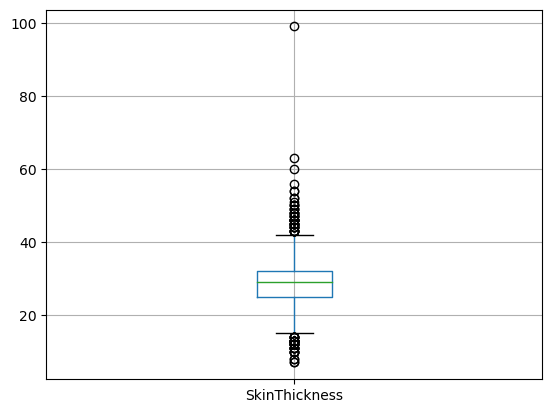

In [20]:
df[['SkinThickness']].boxplot()

<Axes: >

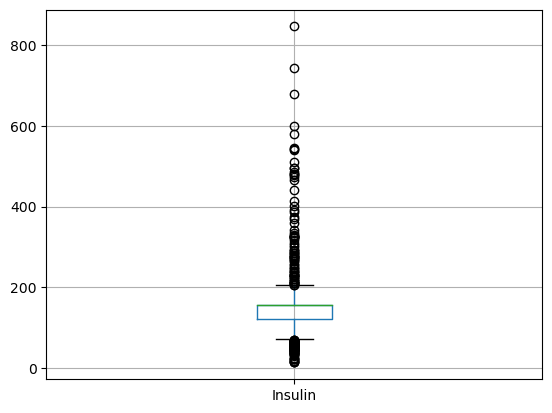

In [21]:
df[['Insulin']].boxplot()

<Axes: >

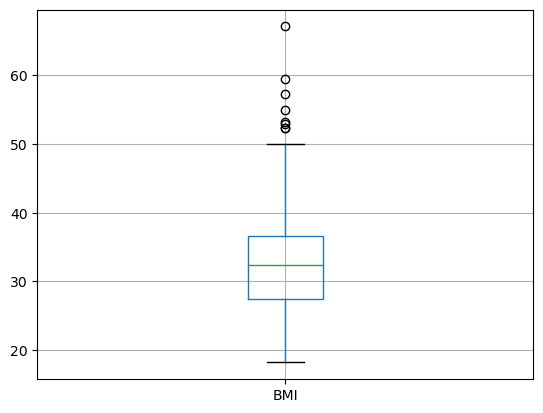

In [22]:
df[['BMI']].boxplot()

<Axes: >

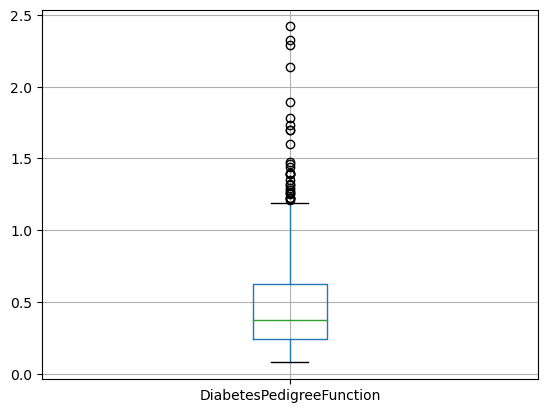

In [23]:
df[['DiabetesPedigreeFunction']].boxplot()

<Axes: >

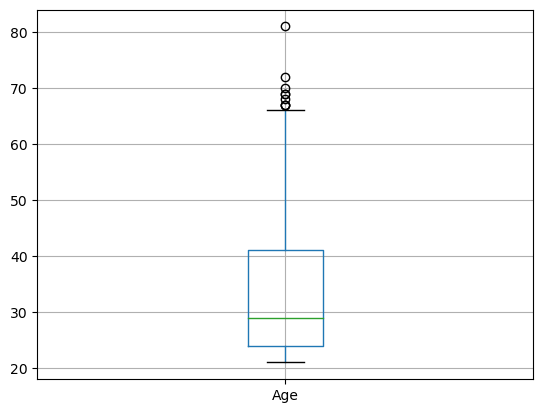

In [24]:
df[['Age']].boxplot()

<Axes: >

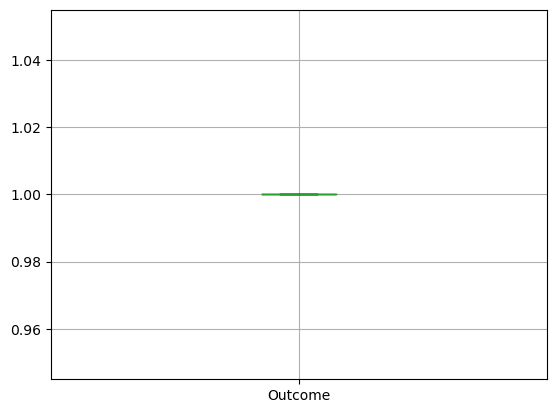

In [25]:
df[['Outcome']].boxplot()

### 17. Plot demographic and distribution of diabetics/nondiabetics across age variable?

<Axes: xlabel='Outcome', ylabel='Age'>

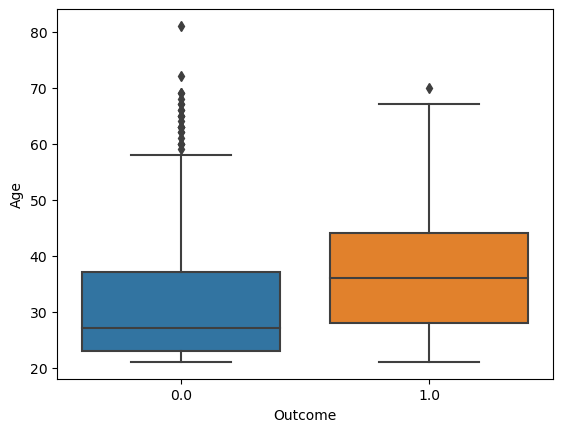

In [26]:
sns.boxplot(x='Outcome',y='Age',data = df.fillna(0))

### 18. Investigate how the number of pregnancies impacts diabetes? Demonstrate the relationship with a plot. 

<Axes: xlabel='Pregnancies', ylabel='count'>

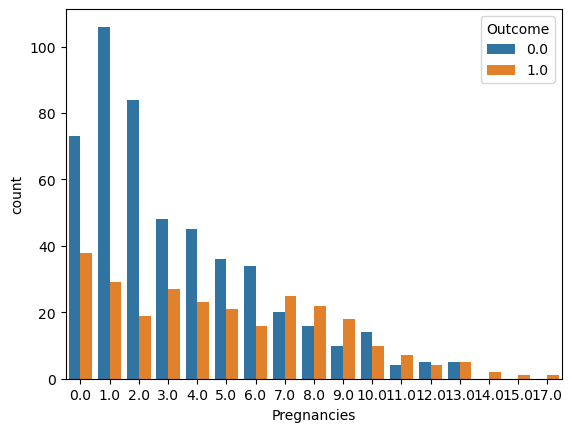

In [27]:
sns.countplot(hue='Outcome',x='Pregnancies',data = df.fillna(0))

### 19. Check if there are any outliers in our dataset. Any data point outside 25% and 75% quarters can be considered an outlier. Remove the outliers from our dataset. 

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
remove_outliers = df[~outlier_condition]
print("Original dataset :", df.shape)
print("Dataset after removing outliers:", remove_outliers.shape)


Original dataset : (768, 9)
Dataset after removing outliers: (517, 9)


### 20. Create a new categorical variable based on BMI using the following criteria. Name the new variable “BMI_tier” and add it to our dataset as a new column. 

- BMI = 0  then “NA”
- 0 < BMI < 18.5 then “Under Weight”
- 18.5 <= BMI < 25 then “Normal”
- 25 <= BMI < 30 then “Overweight” 
- 30 <= BMI then “Obese”


In [29]:
def BMI_tier(BMI):
    if BMI ==0 :
        value = "NA"
    elif BMI < 18.5 :
        value = "Under Weight"
    elif BMI < 25 :
        value = 'Normal'
    elif BMI < 30 :
        value = "Overweight"
    elif BMI >=30:
        value = "Obese"
    return value

df["BMI_tier"] = df["BMI"].apply(lambda x : BMI_tier(x))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0,Obese
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,NaN,Overweight
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0,Normal
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,NaN,Overweight
4,NaN,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0,Obese
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63,NaN,Obese
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27,NaN,Obese
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30,NaN,Overweight
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1.0,Obese


### 21. Plot the BMI_tier histogram ?  

<Axes: >

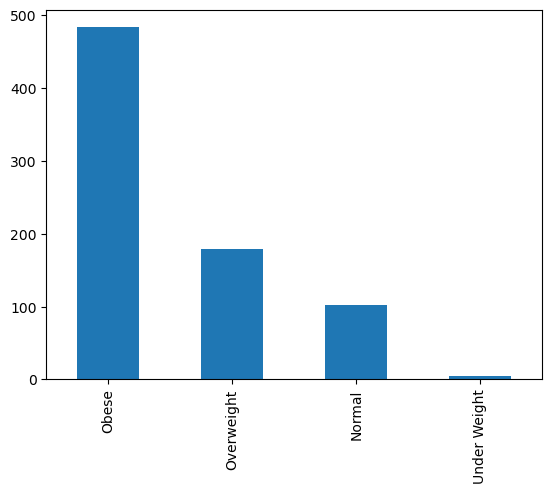

In [30]:
df["BMI_tier"].value_counts().plot(kind='bar')

### 22. How many obese individuals exist in our dataset?  Use  Piechart to illustrate the proportion of each BMI tier? 

Obese count in the dataset is : -  483


<Axes: ylabel='BMI_tier'>

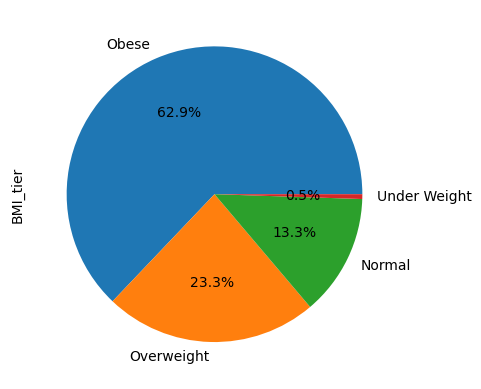

In [31]:
print("Obese count in the dataset is : - ",df[df["BMI_tier"] == "Obese"]["BMI_tier"].count())
df["BMI_tier"].value_counts().plot(kind='pie',autopct='%1.1f%%')

### 23. Create a new categorical variable based on Oral Glucose Tolerance Test (Glucose) using the following criteria, suggested by DIABETES UK. Name the new variable “OGTT_tier” and add it to our dataset as a new column. 

- Glucose == 0 then “NA”
- Glucose < 140 then “Normal”
- 140 <= Glucose < 198 then “Impaired Glucose Tolerance”
- 198 <= Glucose then “Diabetic Level”


In [32]:
def OGTT_tier(Glucose):
    if Glucose ==0 :
        value = "NA"
    elif Glucose < 140 :
        value = 'Normal'
    elif Glucose < 198 :
        value = "Impaired Glucose Tolerance"
    elif Glucose >=198:
        value = "Diabetic Level"
    return value

df["OGTT_tier"] = df["Glucose"].apply(lambda x : OGTT_tier(x))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier,OGTT_tier
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0,Obese,Impaired Glucose Tolerance
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,NaN,Overweight,Normal
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0,Normal,Impaired Glucose Tolerance
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,NaN,Overweight,Normal
4,NaN,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0,Obese,Normal
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63,NaN,Obese,Normal
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27,NaN,Obese,Normal
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30,NaN,Overweight,Normal
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1.0,Obese,Normal


### 24.How many individuals are categorized as “Diabetic Level” in our newly created variable, “OGTT_tier”?  Plot the “OGTT_tier” histogram?   

Diabetic Level count in the dataset is : -  2


<Axes: >

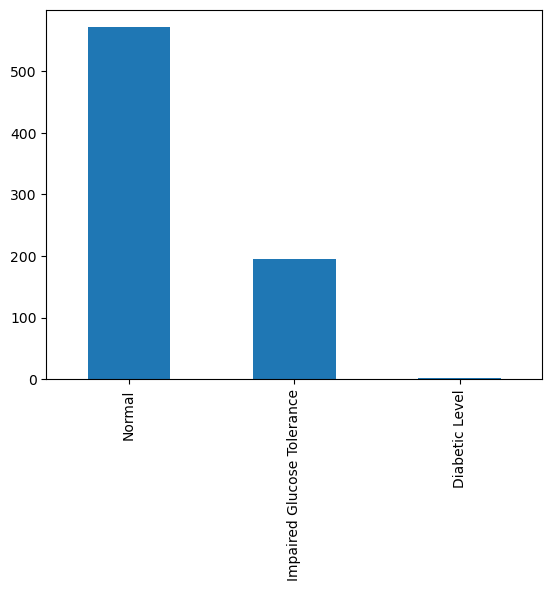

In [33]:
print("Diabetic Level count in the dataset is : - ",df[df["OGTT_tier"] == "Diabetic Level"]["OGTT_tier"].count())
df["OGTT_tier"].value_counts().plot(kind='bar')

### 25. Out of those who categorized as “Impaired Glucose Tolerance”, how many of them are actually diabetes? What about those with “Normal” OGTT_tier?  

In [34]:
df[['OGTT_tier','Outcome']].groupby('OGTT_tier').sum().reset_index().rename(columns={"Outcome":"#Diebetes"})

,OGTT_tier,#Diebetes
0,Diabetic Level,2.0
1,Impaired Glucose Tolerance,133.0
2,Normal,133.0


# Section 2:  ( 2021  Tokyo Olympics ) - ( Weighting = 30% )

In this task we work with 2021 Tokyo summer Olympics dataset. This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics. This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [35]:
athlete_data = pd.read_excel("Athletes.xlsx")
coach_data = pd.read_excel("Coaches.xlsx")
gender_data = pd.read_excel("EntriesGender.xlsx")
medal_data = pd.read_excel("Medals.xlsx")
team_data = pd.read_excel("Teams.xlsx")

C:\Users\ant\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [36]:
# Let's look at the first few rows for each table

In [37]:
athlete_data.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [38]:
coach_data.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [39]:
gender_data.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [40]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [41]:
team_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


### 1. Which countries do most athletes come from? Plot a descendingly ordered bar plot to show athletes counts based on their country of origin? 

 615 Country of origion has most athletes


<Axes: >

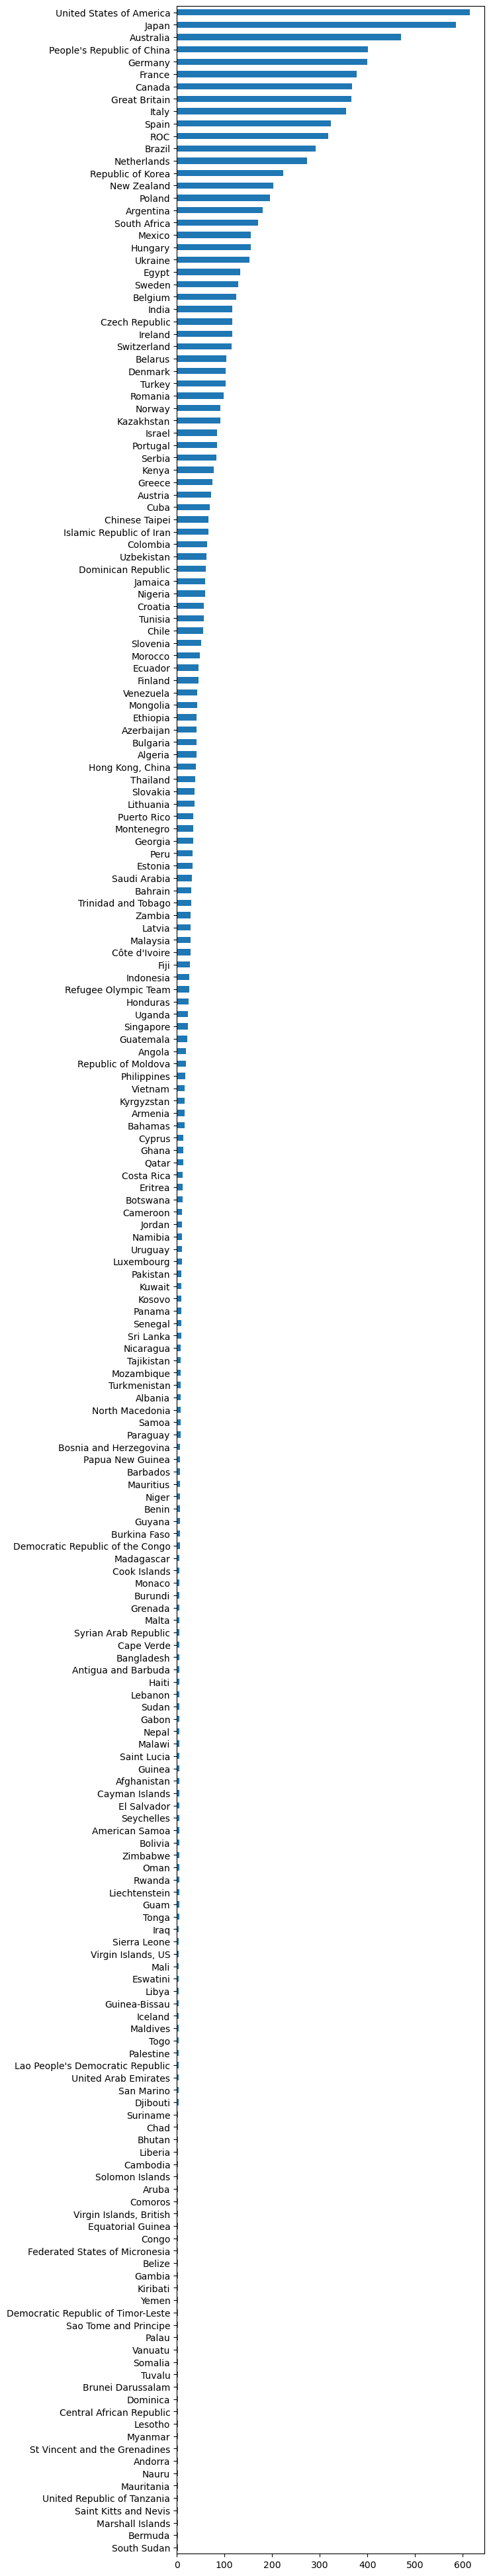

In [42]:
print(" {0} Country of origion has most athletes".format(athlete_data['NOC'].value_counts().reset_index().iloc[0].NOC))
athlete_data['NOC'].value_counts().sort_values().sort_values().plot(kind = 'barh',figsize=(6,50))


### 2. Which country has the most female athletes? Plot a descendingly ordered bar plot to show female athletes counts based on their country of origin?

 8 has most female athletes


<Axes: >

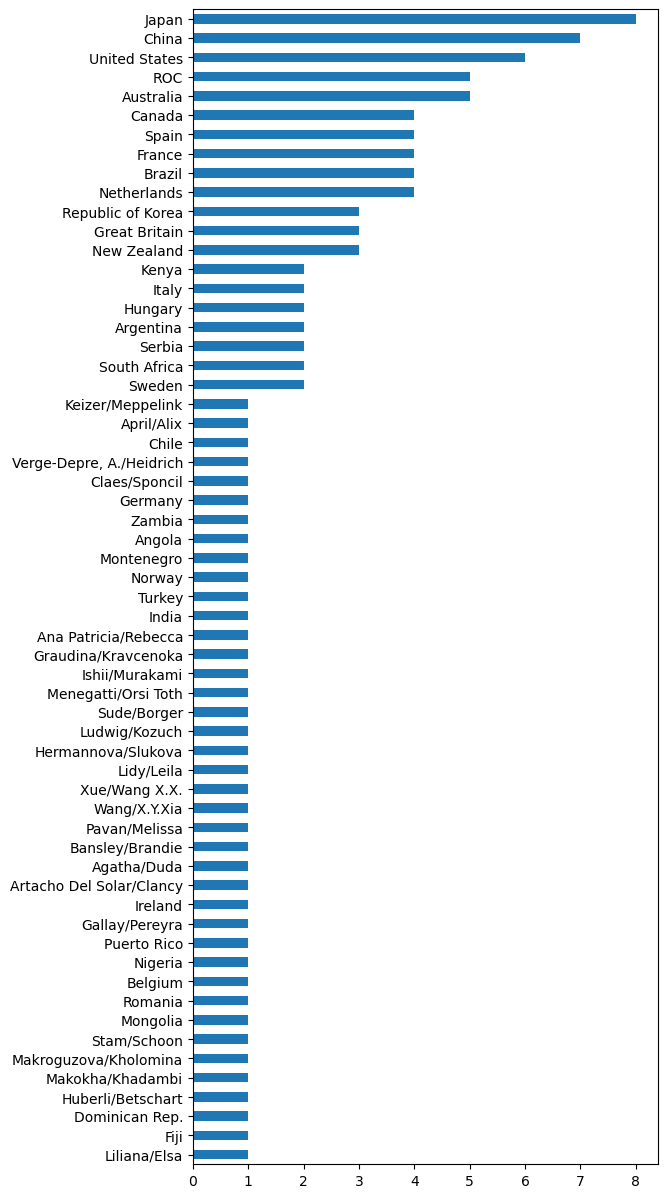

In [43]:
print(" {0} has most female athletes".format(team_data[team_data['Event']=='Women']['Name'].value_counts().reset_index().iloc[0].Name))
team_data[team_data['Event']=='Women']['Name'].value_counts().sort_values().plot(kind = 'barh', figsize=(6, 15))

### 3. Which country has the least female athletes?

In [44]:
female_athletes_by_country = gender_data.groupby('Discipline')['Female'].sum().reset_index()

country_least_female_athletes = female_athletes_by_country.loc[
    female_athletes_by_country['Female'].idxmin()]['Discipline']

print(f"Country with the least female athletes: {country_least_female_athletes}")

Country with the least female athletes: Cycling BMX Freestyle


### 4. Which sport is most popular (based on athletes counts)  and which country has the highest participants in it? Plot a descendingly ordered bar plot to show athlete counts in different sports? 

'Athletics' is most popular sport(based on athletes counts)
'144' has the highest participants in Athletics


<Axes: ylabel='Discipline'>

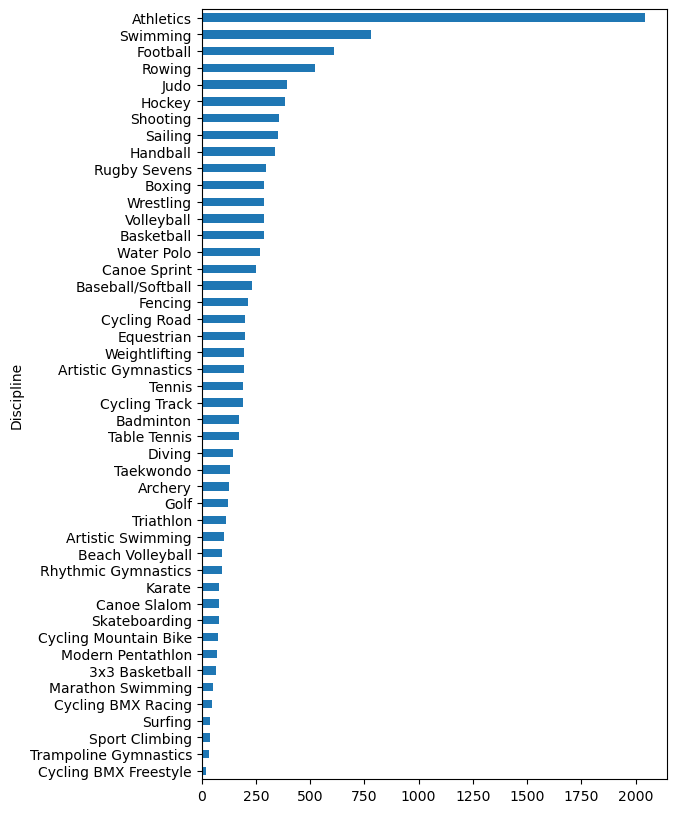

In [45]:
most_popular_sport = gender_data.groupby('Discipline')['Total'].sum().sort_values(ascending=False).reset_index()['Discipline'][0]
country_participants = athlete_data[athlete_data['Discipline'] == most_popular_sport]['NOC'].value_counts().reset_index().NOC[0]
print("'{}' is most popular sport(based on athletes counts)".format(most_popular_sport))
print("'{}' has the highest participants in {}".format(country_participants,most_popular_sport))
gender_data.groupby('Discipline')['Total'].sum().sort_values(ascending=False).sort_values().plot(kind='barh', figsize=(6, 10))

### 5. Plot a descendingly ordered categorical bar plot to show gender segregated athlete counts in different sports.

<Axes: ylabel='Discipline'>

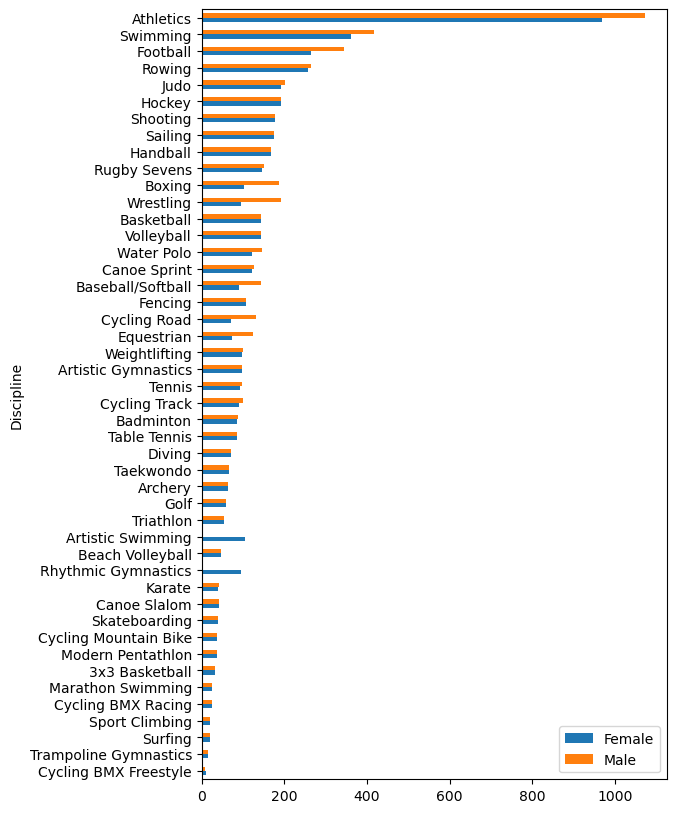

In [46]:
q5_df = gender_data.groupby('Discipline').sum().reset_index().sort_values(by = ['Total'],ascending = True)

q5_df[['Discipline','Female','Male']].set_index('Discipline').plot(kind = 'barh', figsize=(6, 10))

### 6. Which sport has they highest proportion of male to female athletes? Plot a descendingly ordered bar plot to depict male to female athletes proportion across different sports.

<Axes: ylabel='Discipline'>

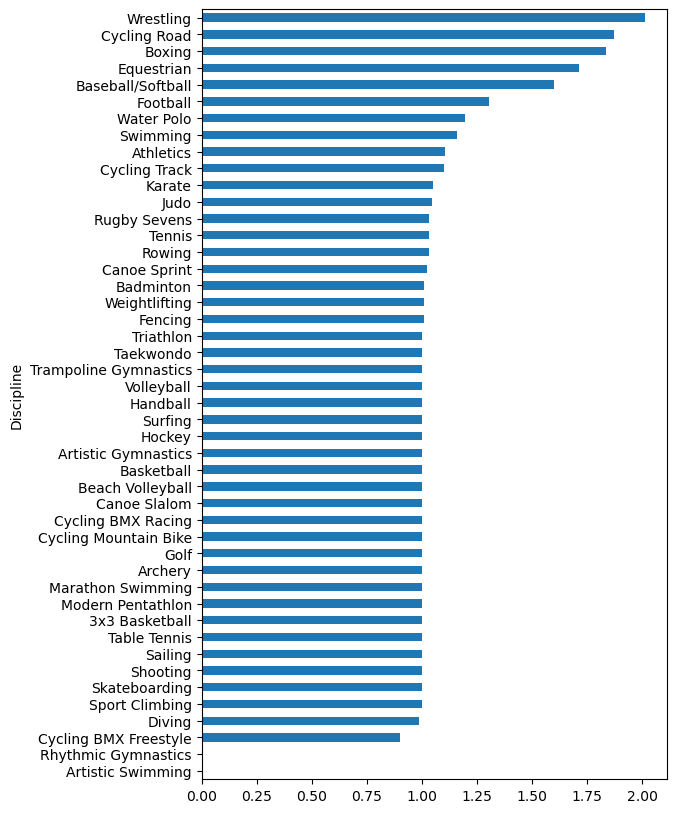

In [47]:
q6_df = gender_data[['Discipline','Female','Male']].groupby('Discipline').sum()
q6_df['Ratio'] = q6_df['Male']/q6_df['Female']
q6_df.sort_values(by="Ratio",ascending=False)['Ratio'].sort_values().plot(kind = 'barh', figsize=(6, 10))

### 7. Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each? Use bar plot to for illustration.  

<Axes: ylabel='Team/NOC'>

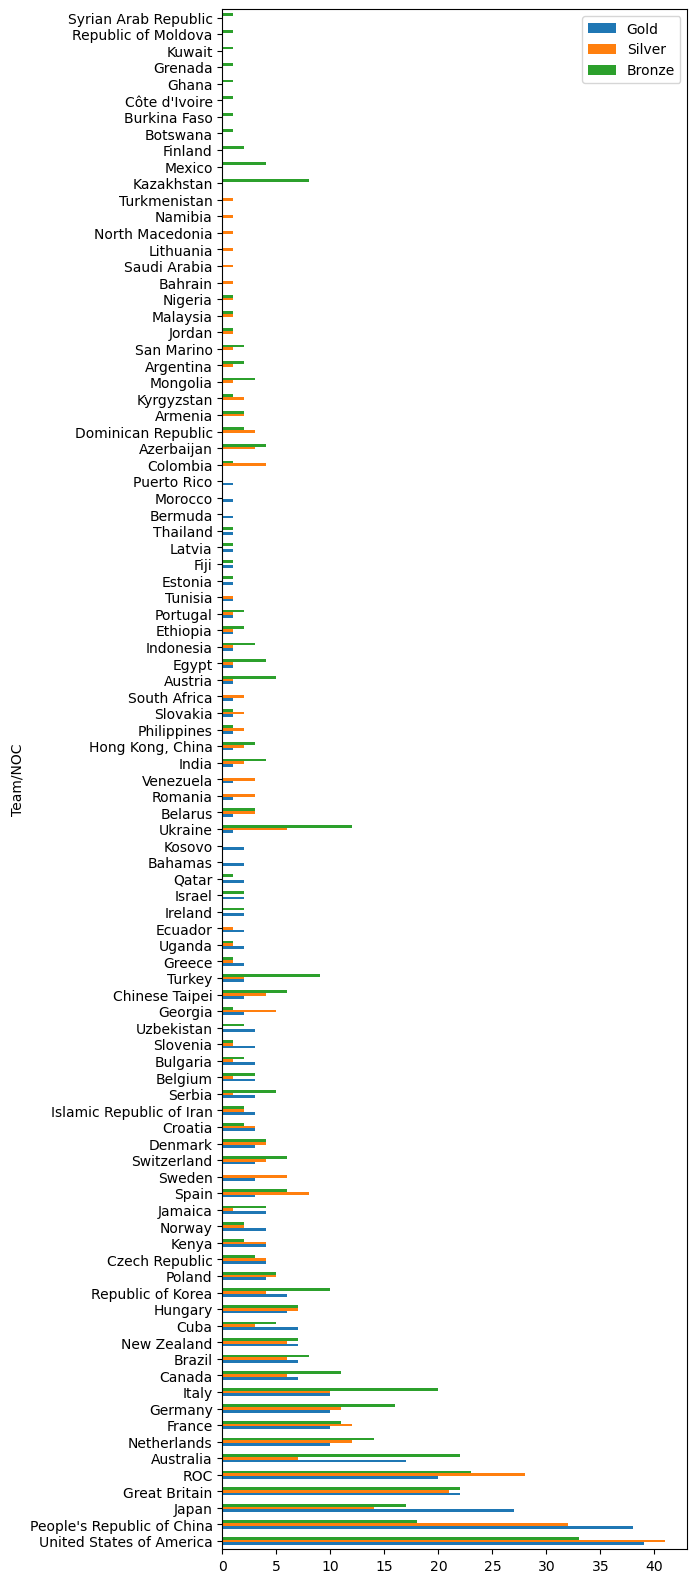

In [48]:
medal_data[["Team/NOC","Gold","Silver","Bronze"]].set_index('Team/NOC').plot(kind = 'barh',figsize=(6, 20))

### 8. Which country has the highest number of medals (Gold – Silver- Bronze) per capita (participants)? 

<Axes: >

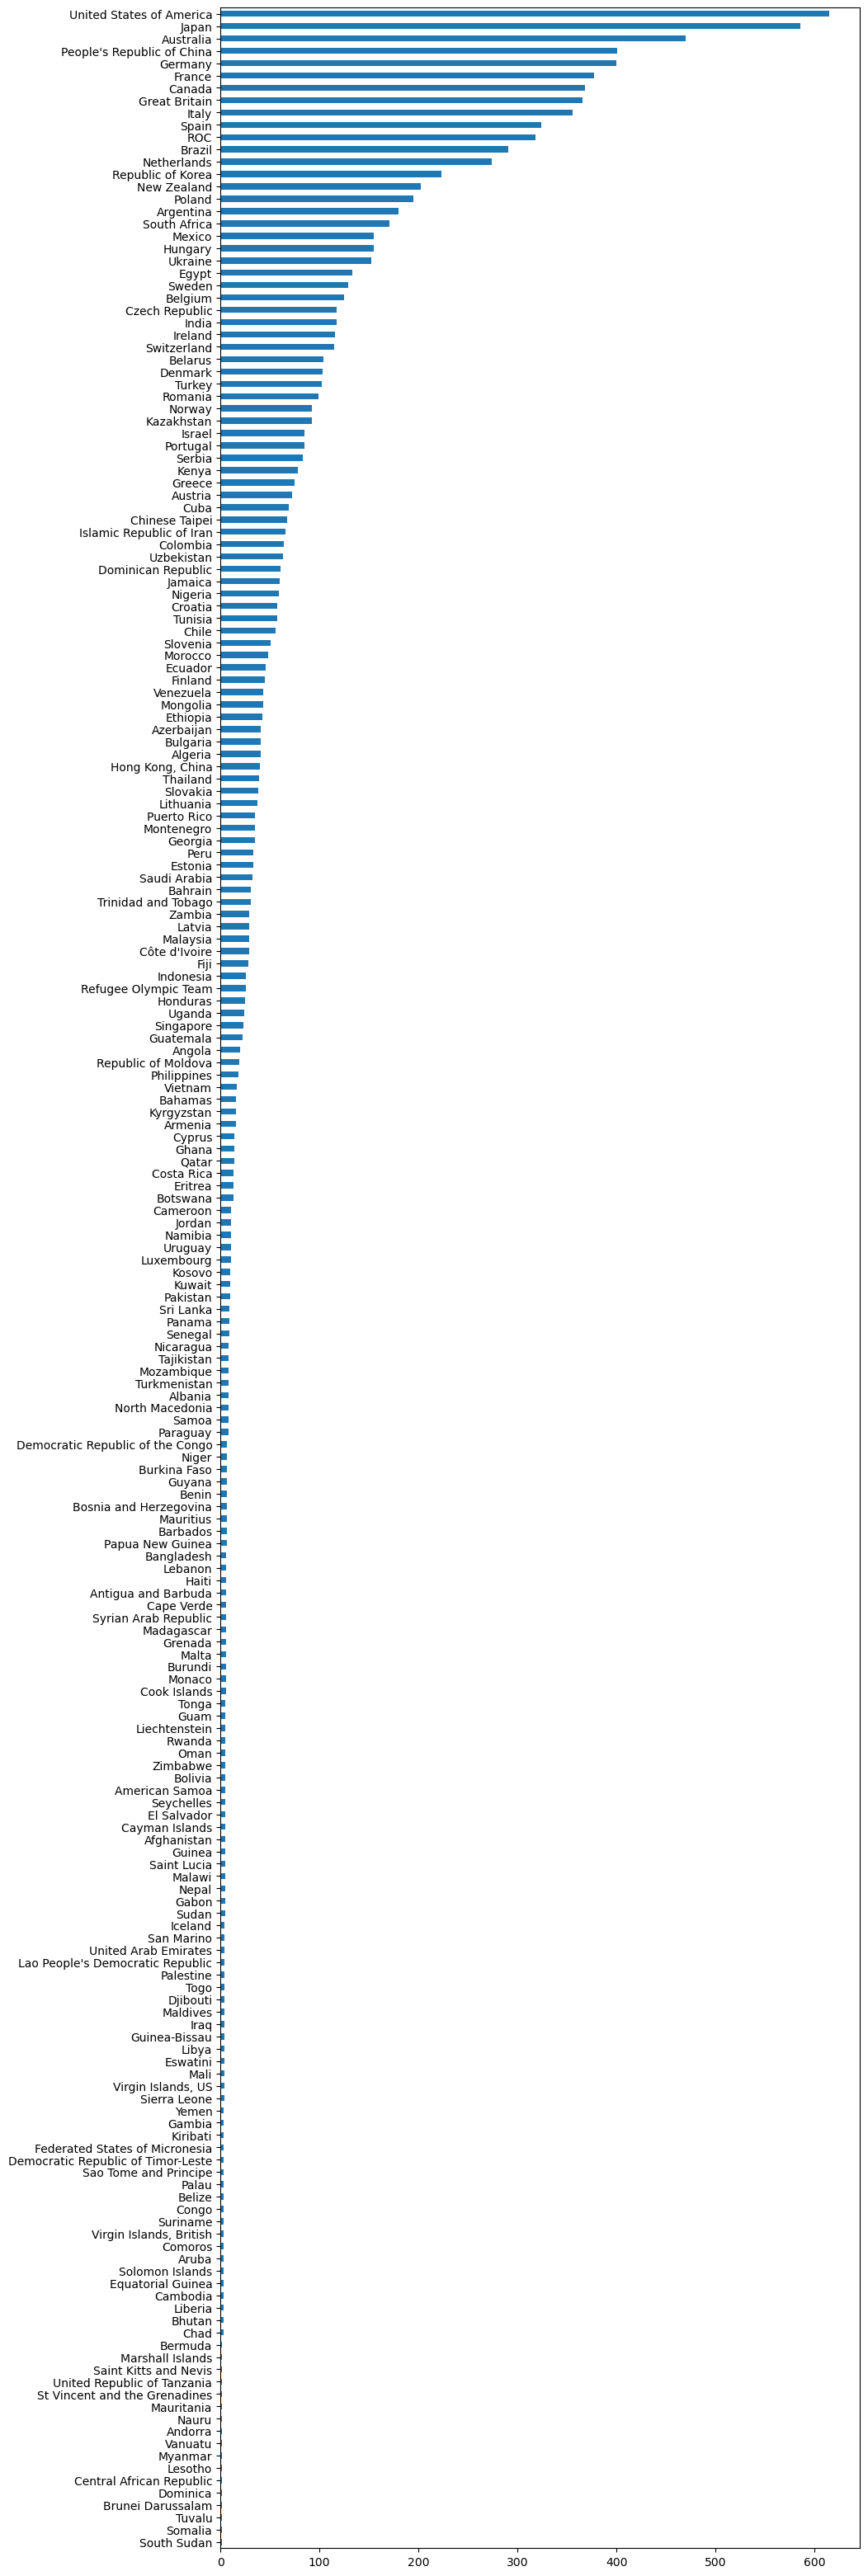

In [49]:
athlete_data['NOC'].value_counts().sort_values().plot(kind = 'barh', figsize=(10, 40))

### 9. List countries with no medals? 

In [50]:
No_Medal=medal_data[medal_data['Total']==0]
No_Medal.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total


### 10. Which country had the greatest number of coaches. Plot a descendingly ordered bar plot to show coach counts in different countries. 

In [51]:
greatest_country = coach_data[['Name','NOC']
                             ].groupby('NOC').count().sort_values(by = 'Name',ascending=False
                                                                 ).reset_index().iloc[0]['NOC']
print("{0} has the greatest number of coaches".format(greatest_country))

Japan has the greatest number of coaches


<Axes: ylabel='NOC'>

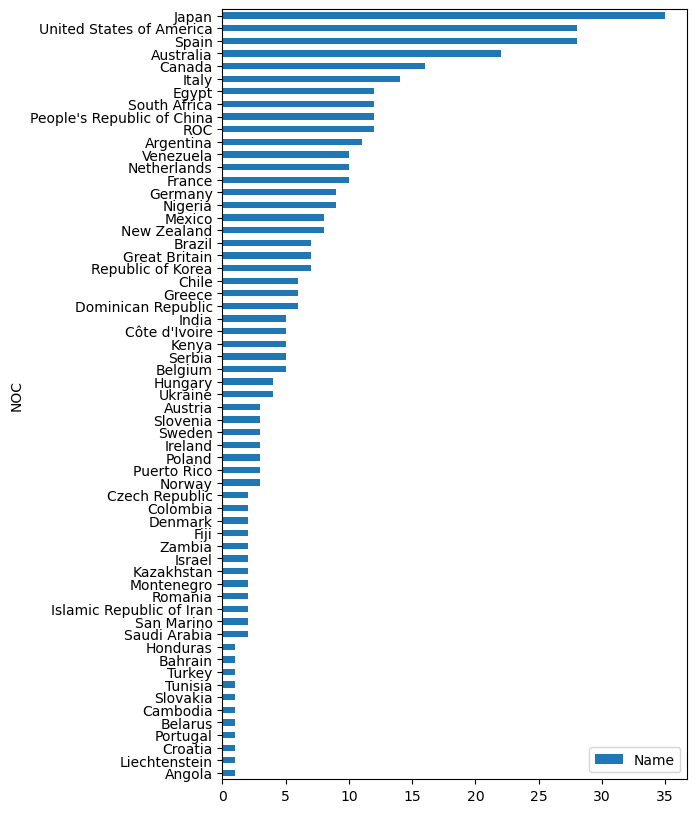

In [52]:
coach_data[['Name','NOC']].groupby('NOC').count().sort_values(by = 'Name',ascending=True).plot(kind='barh',figsize=(6, 10))

### 11. Plot a descendingly ordered bar plot to show coach counts across different sports.  

<Axes: ylabel='Discipline'>

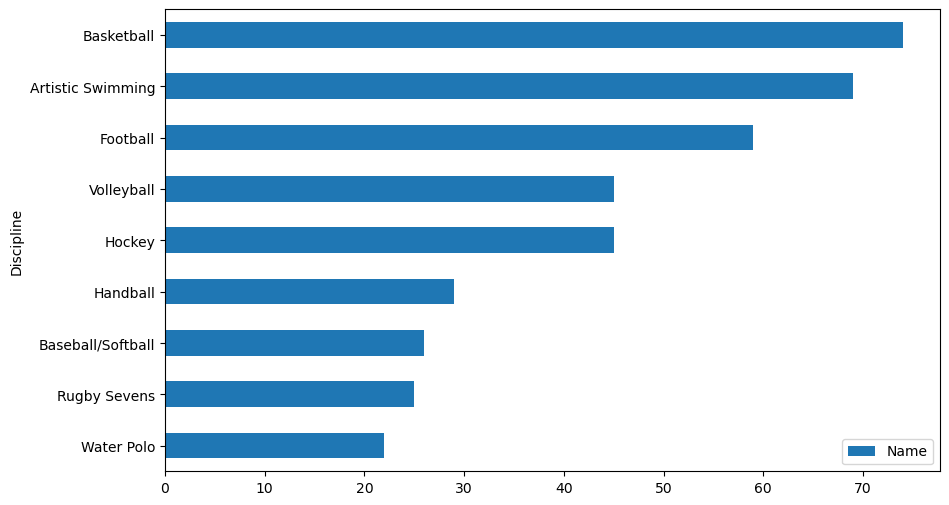

In [53]:
coach_data[['Name','Discipline']].groupby('Discipline').count().sort_values(by = 'Name',ascending=True).plot(kind='barh',figsize=(10, 6))

### 12. Identify the most popular coach, female and male athlete first name? 

In [54]:
most_popular_coach_first_name = coach_data['Name'].apply(lambda x: x.split()[0]).value_counts().idxmax()
if 'Female' in athlete_data['Discipline'].unique():
    most_popular_female_athlete_first_name = athlete_data.loc[athlete_data['Discipline'] == 'Female', 'Name'].apply(lambda x: x.split()[0]).value_counts().idxmax()
    print(f"Most Popular Female Athlete First Name: {most_popular_female_athlete_first_name}")
else:
    print("No female athletes in the dataset.")
if 'Male' in athlete_data['Discipline'].unique():
    most_popular_male_athlete_first_name = athlete_data.loc[athlete_data['Discipline'] == 'Male', 'Name'].apply(lambda x: x.split()[0]).value_counts().idxmax()
    print(f"Most Popular Male Athlete First Name: {most_popular_male_athlete_first_name}")
else:
    print("No male athletes in the dataset.")
print(f"Most Popular Coach First Name: {most_popular_coach_first_name}")


No female athletes in the dataset.
No male athletes in the dataset.
Most Popular Coach First Name: de


# Section 3:  ( Show Analysis ) - ( Weighting = 20% )

based on the provided show dataset, please answer the following questions: 

### 1. Import the dataset in to your workspace as a data frame

In [55]:
show = pd.read_csv("show.csv")
show

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


### 2. Removed all duplicates and perform normal cleaning procedure if needed.

In [56]:
Duplicates_removing=show.drop_duplicates()
Normal_cleaning = show.dropna()
print("Shape Of Removed Duplicates", Duplicates_removing.shape)
print("Shape of Normal Cleaning", Normal_cleaning.shape)

Shape Of Removed Duplicates (8790, 10)
Shape of Normal Cleaning (8790, 10)


### 3. Changing datatype of date_added column to datetime so you can conduct time based analysis

In [57]:
show['date_added']=pd.to_datetime(show['date_added'])
show.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

### 4. Create 3 separate columns for week-day, month, and year based on the date_added column and name them month_added,	year_added, and	day_added respectively. 

In [58]:
show['day_added']=show['date_added'].dt.day_name()
show['month_added']=show['date_added'].dt.month
show['year_added']=show['date_added'].dt.year
show

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,day_added,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Saturday,9,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Friday,9,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",Friday,9,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Wednesday,9,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Friday,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",Tuesday,1,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Thursday,9,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Thursday,12,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Saturday,6,2018


### 5. Group shows by their type and display the frequency of each type. Also, use a piechart to display show type percentage.

Movie      6126
TV Show    2664
Name: type, dtype: int64

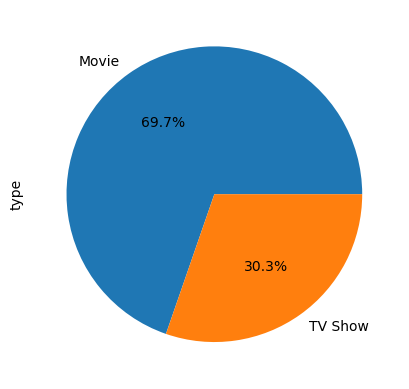

In [59]:
type_counts = show['type'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
show['type'].value_counts()

### 6. Display the number of shows that each director has ever directed along with the show type. 

In [60]:
show.groupby(['director','type']).size()

director             type 
A. L. Vijay          Movie    2
A. Raajdheep         Movie    1
A. Salaam            Movie    1
A.R. Murugadoss      Movie    2
Aadish Keluskar      Movie    1
                             ..
Çagan Irmak          Movie    1
Ísold Uggadóttir     Movie    1
Óskar Thór Axelsson  Movie    1
Ömer Faruk Sorak     Movie    2
Şenol Sönmez         Movie    2
Length: 4581, dtype: int64

### 7. Display the top 10 most active directors. 

In [61]:
show['director'].value_counts().head(10)

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64

### 8. Group shows based on country and type. Display their frequency too. 

In [62]:
show.groupby(['country','type']).size()

country       type   
Argentina     Movie      56
              TV Show    20
Australia     Movie      61
              TV Show    53
Austria       Movie       8
                         ..
Uruguay       TV Show     1
Venezuela     Movie       2
Vietnam       Movie       7
West Germany  Movie       1
Zimbabwe      Movie       1
Length: 138, dtype: int64

### 9. Identify countries with the highest number of show production (top 10). Display their show production frequency too. Beside table, use bar plot to articulate your findings.

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64


<Axes: >

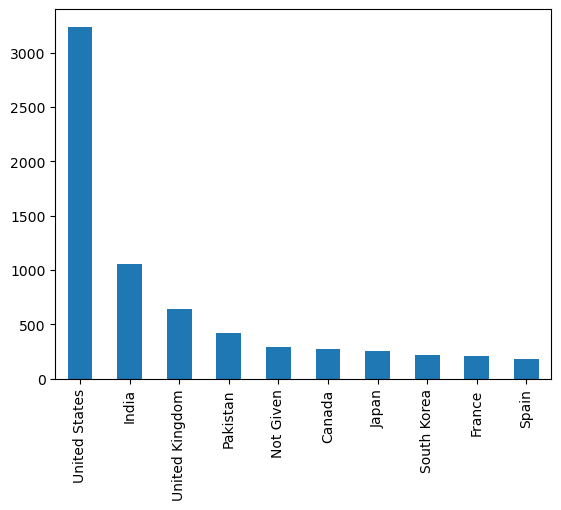

In [63]:
countries = show['country'].value_counts().nlargest(10)
print(countries)
countries.plot(kind='bar')

### 10. Group shows based on the listed_in (genre) feature. Display their frequency too.

In [64]:
genre = show['listed_in'].value_counts()
genre 

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: listed_in, Length: 513, dtype: int64

### 11. Identify the top 10 most popular genre based on the listed_in feature.

In [65]:
genre.nlargest(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

### 12. Use line plot to display show frequency per year segregated by show type. 

<Axes: xlabel='year_added'>

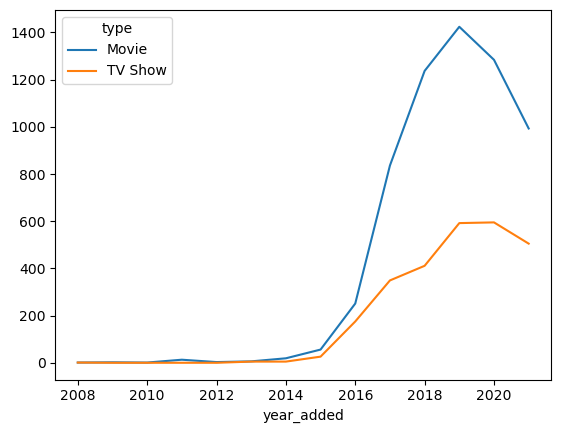

In [66]:
per_year = show.groupby(['year_added','type']).size().unstack().fillna(0)
per_year.plot(kind='line',legend='show_type')

# Section 4:  Analysing Financial Times Stock Exchange 100 Index.
# ( Weighting = 20% )

For this project, you need to upload the file `FTSE100.csv` to Colab.

To do this, look at the menu on the left - there is a list of folders and files you have available. Right click on the sample_data folder and choose "Upload".

Once uploaded, the file should show up the Files structure on the right hand side tab.

Once uploaded, the file path should be  `sample_data/FTSE100.csv`.

Create a dataframe `df` from the CSV file `FTSE100.csv` you just uploaded:


In [67]:
df = pd.read_csv("FTSE100.csv")

In [68]:
df

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,"5,151.00",0.0029,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808,0.0025,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,"4,357.00",0.0035,Hold,22,NaN,3,12,3,3,Neutral


The dataframe contains 101 rows and 13 different columns.

## **Q1** 

Create a function `tidy_rows` that drops any rows in the DataFrame where the Ticker column is equal to given ticker string value `ticker`.

* No other rows should be added or removed
* No columns should be changed
* The order of the columns and rows should be unchanged





In [69]:
def tidy_rows(df, ticker):
    return df[df['Ticker'] != ticker]

Feel free to test your function with ticker set to `CCL`. Your new dataframe should now have 100 rows.

In [70]:
ticker = 'CCL'
df_drop_ticker = tidy_rows(df, ticker)
df_drop_ticker

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,"5,151.00",0.0029,Buy,16,NaN,6,6,2,1,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808,0.0025,Buy,12,NaN,4,4,1,2,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,0,Buy
99,Whitbread,8239,WTB,Retail hospitality,"4,357.00",0.0035,Hold,22,NaN,3,12,3,3,Neutral


## **Q2** 

Create a function `tidy_columns` that drops any columns in the DataFrame where the column name is equal to a given value set by the variable 'column'. It's important to first ensure that the DataFrame contains the column passed.

* No other columns should be changed
* No rows should be added or removed
* The order of the columns and rows should be unchanged




In [71]:
def tidy_columns(df, column):
    if column in df.columns:
        return df.drop(columns=[column])
    else:
        return df



Test your function by passing the variable column set to `Strong Sell`.

In [72]:
column = 'Strong Sell'
df_drop_columns = tidy_columns(df, column)
df_drop_columns

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Unilever,270,ULVR,Personal Goods,"5,151.00",0.0029,Buy,16,NaN,6,6,2,Overweight
97,United Utilities,7788,UU.,"Gas, Water & Multi-utilities",808,0.0025,Buy,12,NaN,4,4,1,Overweight
98,Vodafone Group,5290,VOD,Mobile Telecommunications,155.88,0.0203,Buy,20,NaN,14,3,1,Buy
99,Whitbread,8239,WTB,Retail hospitality,"4,357.00",0.0035,Hold,22,NaN,3,12,3,Neutral


## **Q3** 
Create a function `convert_to_float` that converts the values of a given column from strings into floats.

* Note that the strings may include a comma `,` (e.g. `1,000`) which will need to be removed
* The order of the columns and rows should be unchanged

In [73]:
def convert_to_float(df, column):
    df[column] = df[column].replace(',', '', regex=True).astype(float)
    return df

Test your function on the column `Mid-price (p)`:

In [74]:
print('Type of column Mid-price (p) in df_test_conversion:', df['Mid-price (p)'].dtype)
df_midprice_as_float = convert_to_float(df, 'Mid-price (p)')
print('Type of column Mid-price (p) in df_midprice_as_float:', df_midprice_as_float['Mid-price (p)'].dtype)

Type of column Mid-price (p) in df_test_conversion: object
Type of column Mid-price (p) in df_midprice_as_float: float64


## **Q4** 
Create a function `format_percentage_change` that converts a poorly formatted string representing a percentage into a float. 

Specifically, ensure that any '%' symbols are removed and the string is converted to a float.
* If the float is positive, multiply it by 100
* Ensure that the returned float is in decimal form (e.g. 0.99% -> 99.0)


In [75]:
def format_percentage_change(string):
    return float(string.replace('%', '')) * 100

Test your function with an example `test_string = '-0.49%'`

In [76]:
test_string = '-0.49%'
print(test_string)
print(format_percentage_change(test_string))

-0.49%
-49.0


## **Q5** 
Create a function `holding_summary` that takes as input a df and a tuple `holding` containing a company ticker code, the number of shares, and the price paid (in pence). 

Use the function 'convert_to_float()' to convert the "Mid-price (p)" column to floats, then return a dictionary containing the following keys and values:

    - holding_cost: float, # The cost (in £) of the holding (#shares x price paid)
    - holding_value: float, # The value (in £) of the holding (#shares x current mid-price)
    - change_in_value: float, # The % change from the original price paid to the current price

In [77]:
df.head(2)

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,1099.5,0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,2115.0,-0.42%,Hold,18,NaN,2,6,7,3,Underweight


In [78]:
def holding_summary(df, holding):
    convert_to_float(df, 'Mid-price (p)')
    
    ticker, shares, price_paid = holding
    mid_price = df[df['Ticker'] == ticker]['Mid-price (p)'].values[0]
    
    holding_cost = shares * price_paid / 100  
    holding_value = shares * mid_price / 100  
    change_in_value = format_percentage_change(df[df['Ticker'] == ticker]['Change'].values[0])
    
    return {'holding_cost': holding_cost, 'holding_value': holding_value, 'change_in_value': change_in_value}

Test your function using the tuple `holding = ('AZN', 500, 6700.0)`.

Your holding summary should return the following:
```
{'change_in_value': 9.970149253731343,
 'holding_cost': 33500.0,
 'holding_value': 36840.0}
 ```

In [79]:
holding = ('AZN', 500, 6700.0)
holding_summary(df, holding)

{'holding_cost': 33500.0,
 'holding_value': 36840.0,
 'change_in_value': 1.4000000000000001}

## **Q6** 
Create a function `market_comparison` that returns a DataFrame with the following columns added to the input `df`:
    
* `Change (%)`: this should contain the output of your 'format_percentage_change()' function applied to the "Change" column of the input df
* `Beat Market`: this should be a Boolean column containing True for companies where "Change (%)" exceeds the average market change
* `Buy Ratio`: this should equal the "Buy" column divided by the "Brokers" column

It may help to first calculate the average market change (%)

In [80]:
def market_comparison(df):
    df['Change (%)'] = df['Change'].apply(format_percentage_change)
    avg_market_change = df['Change (%)'].mean()
    df['Beat Market'] = df['Change (%)'] > avg_market_change
    df['Buy Ratio'] = df['Buy'] / df['Brokers']
    return df

Test your function on the FTSE100 `df`. The new dataframe should a  mean buy ration of 0.4274473324766943.

In [81]:
df_market_comparison = market_comparison(df)
df_market_comparison['Buy Ratio'].mean()

0.42744733247669425

## **Q7** 
Create a function `identify_companies` that takes as input a df and a list `watchlist` and returns a list of companies which are in both the watchlist and the df and which match at least one of the following criteria:

* Any company in "watchlist" whose target price is greater than or equal to the current "Mid-price (p)"
* Any company in "watchlist" whose "Buy Ratio" is 0.5 or greater
* Note that the watchlist is a list of tuples. Each tuple contains a string representing a company and a target price. For instance:

        [("Barclays", 135.5), ("AstraZeneca", 750.0), ... ]

In [82]:
def identify_companies(df, watchlist):
    result = []
    for company, target_price in watchlist:
        matching_rows = df[df['Company'] == company]
        if not matching_rows.empty:
            current_price = matching_rows['Mid-price (p)'].values[0]
            buy_ratio = matching_rows['Buy'].values[0] / matching_rows['Brokers'].values[0]

            if any([current_price >= target_price, buy_ratio >= 0.5]):
                result.append(company)
    return result

Test your function with a watchlist set as 
```
watchlist = [('Imperial Brands', 100.0), ('Aveva', 3900.0)]
```

The returned list should have two companies.


In [83]:
watchlist = [('Imperial Brands', 100.0), ('Aveva', 3900.0)]
companies_list = identify_companies(df, watchlist)
print(companies_list)
print(len(companies_list))

['Imperial Brands']
1


## **Q8**  
Create a function `sector_performance` which outputs a summary of stock market performance by market sector together with the the sector performance of a private portfolio of shares.

The stock market performance is passed in via a DataFrame which contains the following columns:
* Ticker: the abbreviation used to uniquely identify the company
* Sector: the market sector of the company
* Shares: the number of shares in the stock market index
* Mid-price (p): the price of the shares at the end of the day
* Change: the change in price over the course of the day

The private portfolio information consists of a dictionary whose key:value pairs are ticker: number of shares held in the portfolio for each company. 

Note, that the portfolio does not necessarily hold all of the shares in the index.

The function should return a new DataFrame with the following columns:
* Sector (index column): the market sectors as they appear in the provided DataFrame (string)
* Market Cap %: the percentage of the index represented by that sector, at end of the day (float)
* Sector Return: the return (expressed as a percentage) from the shares in that sector, calculated as an arithmetic average and using Market Cap % as the weights.
* Portfolio %: the percentage of the portfolio in each sector based on prices at the end of the day (float)
* Portfolio Return: the return (expressed as a percentage) from the shares held by the portfolio in each sector

It should be sorted in descending order of Market Cap % and any sectors which are not in the private portfolio should be removed.

In [84]:
def clean_change_column(value):
    try:
        return float(value.replace('%', '').replace(',', ''))
    except ValueError:
        return float('nan')

def sector_performance(df, dct):
    df['Change'] = df['Change'].apply(clean_change_column)
    portfolio_df = df[df['Ticker'].isin(dct.keys())]
    sector_market_cap = df.groupby('Sector')['Shares'].sum()
    total_market_cap = sector_market_cap.sum()
    sector_market_cap_percentage = (sector_market_cap / total_market_cap) * 100
    sector_return = df.groupby('Sector')['Change'].mean()


    result_df = pd.DataFrame({
        'Market Cap %': sector_market_cap_percentage,
        'Sector Return': sector_return
    })
    for ticker, shares in dct.items():
        if ticker in portfolio_df['Ticker'].values:
            result_df['Portfolio %'] = portfolio_df.groupby('Sector')['Shares'].sum() / portfolio_df['Shares'].sum() * 100
            result_df['Portfolio Return'] = portfolio_df.groupby('Sector')['Change'].mean()
    result_df = result_df.sort_values(by='Market Cap %', ascending=False)

    return result_df

Test your function for the ticker RDSA with 4 shares:
```
dct = {'RDSA': 4}
```

In [85]:
dct = {'RDSA': 4}
sector_performance(df, dct)

,Market Cap %,Sector Return,Portfolio %,Portfolio Return
Sector,,,,
Support Services,10.499362,-0.032737,NaN,NaN
Mining,7.715091,0.022633,NaN,NaN
Food & Drug Retailers,6.145154,-0.112700,NaN,NaN
Life Insurance,6.135406,0.009860,NaN,NaN
Banks,6.113474,-0.318100,NaN,NaN
"Gas, Water & Multi-utilities",6.061362,0.003150,NaN,NaN
Household Goods & Home Construction,6.023683,-0.019040,NaN,NaN
Financial Services,5.146955,0.015420,NaN,NaN
Oil & Gas Producers,4.500798,0.011333,100.0,0.0105


## **Q9** 
At the end of the day, the broker sends a list of buy and sell recommendations to clients.  They include the ticker of those companies with a 'buy' recommendation that have fallen in value, and those with a 'sell' recommendation that have risen in value.  In both cases, if there is no change in value, the company ticker is included in the list. Write a function `recommendations` that returns a list for `buy` recommendations and one for `sell` recommendations.

If there are no companies which satisfy a buy or a sell criteria, your function should return the string "There are no Buy recommendations today." and/or "There are no Sell recommendations today." instead of a list.

In the DataFrame provided as a parameter, the column to be used for the recommendation is "Our view".  Note that items in the column can take the values Sell, Buy or Hold, but sometimes the typist uses the wrong case (e.g. he might type SELL, or buy etc).

In [86]:
def recommendations(df):
    df['Our view'] = df['Our view'].str.lower()
    buy_recommendations = df[(df['Our view'].isin(['buy', 'b'])) & (df['Change'] < 0)]['Ticker'].tolist()
    sell_recommendations = df[(df['Our view'].isin(['sell', 's'])) & (df['Change'] > 0)]['Ticker'].tolist()

    if buy_recommendations:
        buy_result = buy_recommendations
    else:
        buy_result = "There are no Buy recommendations today."

    if sell_recommendations:
        sell_result = sell_recommendations
    else:
        sell_result = "There are no Sell recommendations today."

    return buy_result, sell_result


Test your function on the FTSE 100 df. Your function should return a list of `buy` recommenmdations and the string 'There are no Sell recommendations today.'

In [87]:
recommendations(df)

(['CPG', 'EXPN', 'NMC', 'SMDS', 'STAN'],
 'There are no Sell recommendations today.')

## Good Luck!